In [1]:
import numpy as np
import pandas as pd
import sklearn as sl
import scipy as sp
import seaborn as sb
import matplotlib as mpl
from matplotlib import pyplot as plt
import oct2py as oclib

ModuleNotFoundError: No module named 'oct2py'

In [2]:
pip install mlxtend

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB 146.3 kB/s eta 0:00:10
     - -------------------------------------- 0.0/1.4 MB 164.3 kB/s eta 0:00:08
     -- ------------------------------------- 0.1/1.4 MB 306.3 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.4 MB 291.5 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.4 MB 291.5 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.4 MB 291.5 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.4 MB 291.5 kB/s eta 0:00:05
     -- ------

In [3]:
josb_assets_list = [101.783,90.671,81.41,77.144,82.515,84.751,88.954,108.457,133.993,186.511,231.83,
                 304.832,368.392,440.098,491.366,556.364,662.037,813.612,894.847,935.738]
mw_assets_list = [160.494,204.105,295.478,379.415,403.732,611.195,707.734,717.869,769.313,869.198,993.322,
               1123.274,1096.952,1256.467,1187.73,1232.106,1320.318,1405.952,1496.347,1555.23]

In [5]:
year_list = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013]

Text(0, 0.5, 'Total Assets')

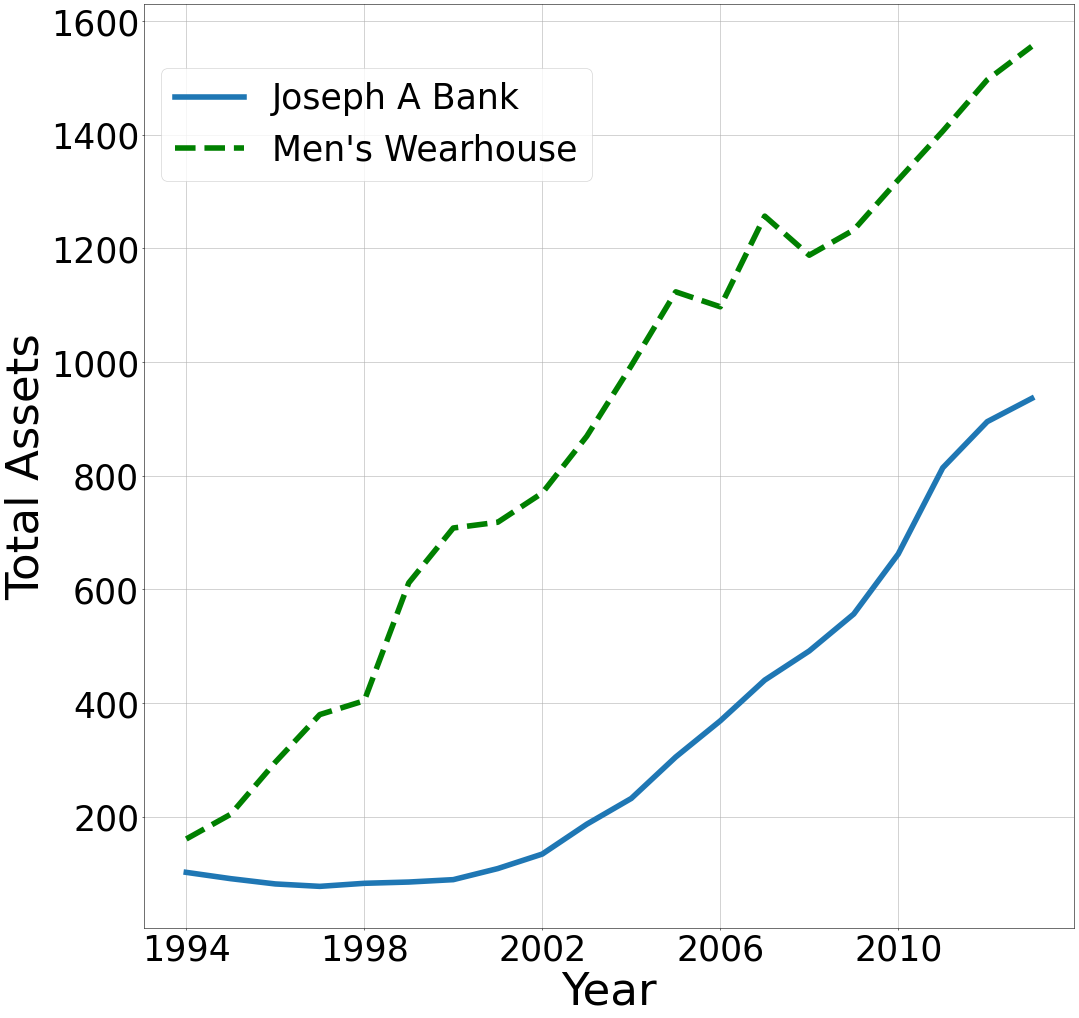

In [8]:
plt.figure(figsize=(24,24), dpi= 50)
plt.plot(year_list,josb_assets_list,label="Joseph A Bank",linewidth=8)
plt.plot(year_list,mw_assets_list,'g--',label="Men's Wearhouse",linewidth=8)
xtick_location = np.arange(1994,2013,4)
plt.xticks(ticks=xtick_location, rotation=0, fontsize=50, horizontalalignment='center')
plt.legend(bbox_to_anchor=(0.50, 0.95),fontsize=50)
plt.yticks(fontsize=50)
plt.grid(axis='both')
plt.xlabel('Year', fontsize = 65)
plt.ylabel('Total Assets', fontsize = 65)

Text(0.5, 1.0, 'Histogram of Asset Values in NYSE')

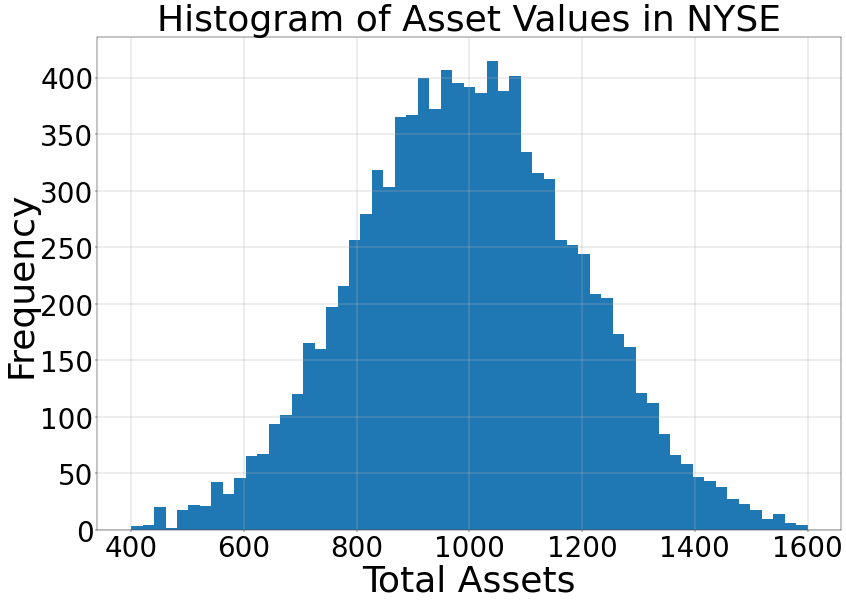

In [11]:
random_values = np.random.normal(1000,200,10000)
bins = np.linspace(400,1600,60)
plt.figure(figsize=(24,16), dpi= 40)
plt.hist(random_values,bins)
plt.xlabel('Total Assets', fontsize = 65)
plt.ylabel('Frequency', fontsize = 65)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.grid(axis='both')
plt.title('Histogram of Asset Values in NYSE', fontsize = 65)

In [14]:
sp.stats.norm.isf(0.05,40000,10000)

56448.53626951473

In [15]:
df= pd.read_csv(r"C:\Users\16479\Downloads\sales_data.csv")

In [16]:
df.head()

,Order ID,Product ID,Amount (kg),Order Confirm Date,Required Delivery Date
0,1005781.0,8908023.0,20000.0,NaN,2020-07-30
1,1005998.0,8909373.0,6297.0,NaN,2020-07-15
2,1005969.0,8908023.0,20000.0,2020-05-29,NaN
3,1005969.0,8908023.0,20000.0,2020-05-29,NaN
4,NaN,NaN,NaN,NaN,NaN


In [17]:
from mlxtend.preprocessing import TransactionEncoder

In [18]:
shopping_basket= pd.read_csv(r"C:\Users\16479\Downloads\small_dataset.csv")

In [19]:
transaction_list = list(shopping_basket["ItemsPurchased"].apply(lambda t:t.split(",")))
encoder = TransactionEncoder().fit(transaction_list)
encoded_transaction_list = encoder.transform(transaction_list)
ideal_format_table = pd.DataFrame(encoded_transaction_list, columns = encoder.columns_)
ideal_format_table.head()

,biscuit,bread,cereal,jam,milk,tea
0,True,True,False,False,True,False
1,True,True,True,False,True,False
2,False,True,False,False,False,True
3,False,True,False,True,True,False
4,True,False,False,False,False,True


In [21]:
transaction_list = list(shopping_basket["ItemsPurchased"].apply(lambda t:t.split(",")))
transaction_list

[['biscuit', 'bread', 'milk'],
 ['biscuit', 'bread', 'cereal', 'milk'],
 ['bread', 'tea'],
 ['bread', 'jam', 'milk'],
 ['biscuit', 'tea'],
 ['bread', 'tea'],
 ['cereal', 'tea'],
 ['biscuit', 'bread', 'tea'],
 ['bread', 'jam', 'tea'],
 ['bread', 'milk'],
 ['biscuit', 'cereal'],
 ['biscuit', 'bread', 'milk', 'tea'],
 ['bread', 'tea'],
 ['bread', 'jam', 'milk'],
 ['biscuit', 'tea'],
 ['bread', 'tea'],
 ['cereal', 'tea'],
 ['bread', 'tea'],
 ['bread', 'jam', 'tea'],
 ['bread', 'milk']]

In [22]:
encoder = TransactionEncoder().fit(transaction_list)
encoder

TransactionEncoder()

In [23]:
encoded_transaction_list = encoder.transform(transaction_list)
encoded_transaction_list

array([[ True,  True, False, False,  True, False],
       [ True,  True,  True, False,  True, False],
       [False,  True, False, False, False,  True],
       [False,  True, False,  True,  True, False],
       [ True, False, False, False, False,  True],
       [False,  True, False, False, False,  True],
       [False, False,  True, False, False,  True],
       [ True,  True, False, False, False,  True],
       [False,  True, False,  True, False,  True],
       [False,  True, False, False,  True, False],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False,  True,  True],
       [False,  True, False, False, False,  True],
       [False,  True, False,  True,  True, False],
       [ True, False, False, False, False,  True],
       [False,  True, False, False, False,  True],
       [False, False,  True, False, False,  True],
       [False,  True, False, False, False,  True],
       [False,  True, False,  True, False,  True],
       [False,  True, False, Fa

In [24]:
ideal_format_table = pd.DataFrame(encoded_transaction_list, columns = encoder.columns_)
ideal_format_table

,biscuit,bread,cereal,jam,milk,tea
0,True,True,False,False,True,False
1,True,True,True,False,True,False
2,False,True,False,False,False,True
3,False,True,False,True,True,False
4,True,False,False,False,False,True
5,False,True,False,False,False,True
6,False,False,True,False,False,True
7,True,True,False,False,False,True
8,False,True,False,True,False,True
9,False,True,False,False,True,False
